## Understanding time series forecasting

### Time series



A time series is a set of data points ordered in time.
The data is equally spaced in time, meaning that it was recorded at every hour, minute,
month, or quarter. Typical examples of time series include the closing value of a
stock, a household’s electricity consumption, or the temperature outside.

Let’s consider a dataset representing the quarterly earnings per share in US dollars of
Johnson & Johnson stock from 1960 to 1980

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [30]:
df_JJ = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')

df_JJ.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [31]:
pd.DatetimeIndex(df_JJ['date']).year

Int64Index([1960, 1960, 1960, 1960, 1961, 1961, 1961, 1961, 1962, 1962, 1962,
            1962, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1965, 1965,
            1965, 1965, 1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1968,
            1968, 1968, 1968, 1969, 1969, 1969, 1969, 1970, 1970, 1970, 1970,
            1971, 1971, 1971, 1971, 1972, 1972, 1972, 1972, 1973, 1973, 1973,
            1973, 1974, 1974, 1974, 1974, 1975, 1975, 1975, 1975, 1976, 1976,
            1976, 1976, 1977, 1977, 1977, 1977, 1978, 1978, 1978, 1978, 1979,
            1979, 1979, 1979, 1980, 1980, 1980, 1980],
           dtype='int64', name='date')

In [32]:
pd.DatetimeIndex(df_JJ['date']).month

Int64Index([ 1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,
             4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,
             7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7,
            10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,
             1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10,  1,  4,  7, 10],
           dtype='int64', name='date')

In [33]:
df_JJ['year'] = pd.DatetimeIndex(df_JJ['date']).year
df_JJ['month'] = pd.DatetimeIndex(df_JJ['date']).month
df_JJ

,date,data,year,month
0,1960-01-01,0.71,1960,1
1,1960-04-01,0.63,1960,4
2,1960-07-02,0.85,1960,7
3,1960-10-01,0.44,1960,10
4,1961-01-01,0.61,1961,1
...,...,...,...,...
79,1979-10-01,9.99,1979,10
80,1980-01-01,16.20,1980,1
81,1980-04-01,14.67,1980,4
82,1980-07-02,16.02,1980,7


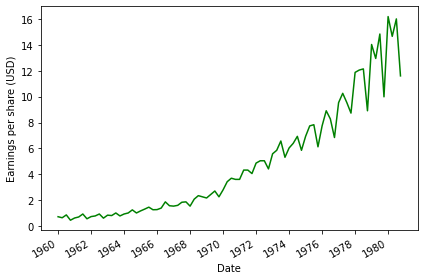

In [41]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data, color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, len(df), 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# plt.xticks(np.arange(0, len(df), 4), [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1069, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980])

fig.autofmt_xdate()
plt.tight_layout()

The data is indexed by
time, as marked on the horizontal axis. Also, the data is equally spaced in time, since it
was recorded at the end of every quarter of each year. We can see that the data has a
trend, since the values are increasing over time. We also see the earnings going up and
down over the course of each year, and the pattern repeats every year.

### Components of a time series

We can further our understanding of time series by looking at their three components:
a trend, a seasonal component, and residuals. In fact, all time series can be
decomposed into these three elements.
Visualizing the components of a time series is known as decomposition. Decomposition
is defined as a statistical task that separates a time series into its different components.
We can visualize each individual component, which will help us identify the
trend and seasonal pattern in the data, which is not always straightforward just by
looking at a dataset.

Let’s take a closer look at the decomposition of Johnson & Johnson quarterly earnings
per share, shown in figure 1.2. You can see how the Observed data was split into
Trend, Seasonal, and Residuals. Let’s study each piece of the graph in more detail.

In [35]:
advanced_decomposition = STL(df_JJ.data, period=4).fit()

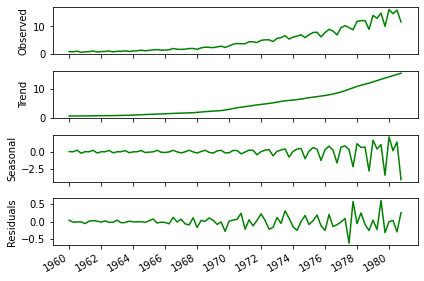

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed, color='green')
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend, color='green')
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal, color='green')
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid, color='green')
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, len(df_JJ), 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()


First, the top graph, labeled as Observed, simply shows the time series as it was recorded in the first graph

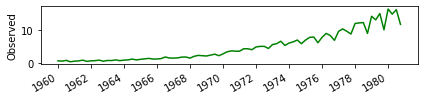

In [47]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed, color='green')
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

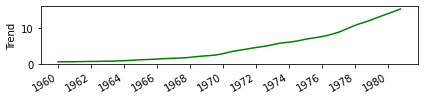

In [48]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend, color='green')
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

Next we see the seasonal component in figure 1.5. The seasonal component captures
the seasonal variation, which is a cycle that occurs over a fixed period of time.
We can see that over the course of a year, or four quarters, the earnings per share start
low, increase, and decrease again at the end of the year.

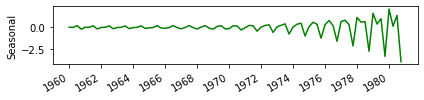

In [49]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal, color='green')
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

Finally, the last graph in figure 1.2 shows the residuals, which is what cannot be
explained by either the trend or the seasonal components.

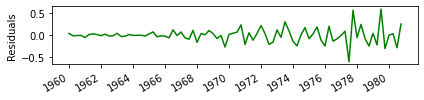

In [50]:

fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid, color='green')
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

Summary: Time series decomposition

Time series decomposition is a process by which we separate a time series into its
components: trend, seasonality, and residuals.
The trend represents the slow-moving changes in a time series. It is responsible for
making the series gradually increase or decrease over time.
The seasonality component represents the seasonal pattern in the series. The cycles
occur repeatedly over a fixed period of time.
The residuals represent the behavior that cannot be explained by the trend and seasonality
components. They correspond to random errors, also termed white noise.

If a time series exposes a certain trend, then we’ll expect it to continue in the future.
Similarly, if we observe a strong seasonality effect, this is likely going to continue, and
our forecasts must reflect that.

The following graph has superimposed the observed series and the trend:

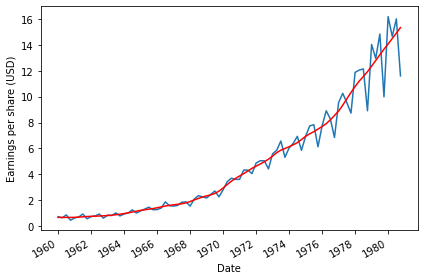

In [54]:
fig, ax = plt.subplots()

ax.plot(df_JJ.date, df_JJ.data)
ax.plot(advanced_decomposition.trend, color='red', linestyle='-', label='Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

### How time series forecasting is different from other regression tasks

You probably have encountered regression tasks where you must predict some continuous
target given a certain set of features. At first glance, time series forecasting seems
like a typical regression problem: we have some historical data, and we wish to build a
mathematical expression that will express future values as a function of past values.
However, there are some key differences between time series forecasting and regression
for time-independent scenarios that deserve to be addressed before we look at
our very first forecasting technique.

#### Time series have an order

The first concept to keep in mind is that time series have an order, and we cannot
change that order when modeling. In time series forecasting, we express future values
as a function of past values. Therefore, we must keep the data in order, so as to not violate
this relationship.

Other regression tasks in machine learning often do not have an order. For example,
if you are tasked to predict revenue based on ad spend, it does not matter when a
certain amount was spent on ads. Instead, you simply want to relate the amount of ad
spend to the revenue. In fact, you might even randomly shuffle the data to make your
model more robust. Here the regression task is to simply derive a function such that
given an amount on ad spend, an estimate of revenue is returned.
On the other hand, time series are indexed by time, and that order must be kept.

#### Time series sometimes do not have features

It is possible to forecast time series without the use of features other than the time
series itself.
As data scientists, we are used to having datasets with many columns, each representing
a potential predictor for our target. For example, consider the task of predicting
revenue based on ad spend, where the revenue is the target variable. As features,
we could have the amount spent on Google ads, Facebook ads, and television ads.
Using these three features, we would build a regression model to estimate revenue.
However, with time series, it is quite common to be given a simple dataset with a
time column and a value at that point in time. Without any other features, we must
learn ways of using past values of the time series to forecast future values. This is when
the moving average model (chapter 4) or autoregressive model (chapter 5) come into
play, as they are ways to express future values as a function of past values

## A naive prediction of the future

Baseline model

A baseline model is a trivial solution to your forecasting problem. It relies on heuristics
or simple statistics and is usually the simplest solution. It does not require
model fitting, and it is easy to implement.

In this chapter, let’s imagine that we wish to predict the quarterly earnings per
share (EPS) of Johnson & Johnson. We can look at the dataset in figure 2.1, which is
identical to what you saw in chapter 1. Specifically, we will use the data from 1960 to
the end of 1979 in order to predict the EPS for the four quarters of 1980. The forecasting
period is illustrated by the red zone in figure 2.1

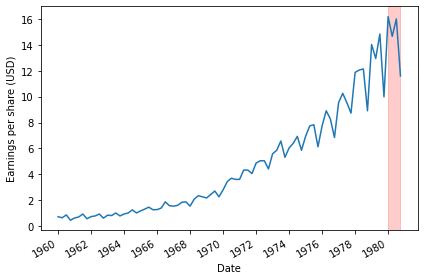

In [56]:
fig, ax = plt.subplots()

ax.plot(df_JJ['date'], df_JJ['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='red', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

Forecasting the historical mean

As mentioned at the beginning of the chapter, we are going to work with the quarterly
EPS in US dollars (USD) of Johnson & Johnson from 1960 to 1980. Our goal is to use
the data from 1960 to the end of 1979 to predict the four quarters of 1980. The first
baseline we’ll discuss uses the historical mean, which is the arithmetic mean of past
values. Its implementation is straightforward: calculate the mean of the training set,
and it will be our prediction for the four quarters of 1980.

In [60]:
train_df_JJ = df_JJ.iloc[0:80 , ]

In [63]:
test_df_JJ = df_JJ.iloc[80:83 , ]

In [61]:
train_df_JJ

,date,data,year,month
0,1960-01-01,0.71,1960,1
1,1960-04-01,0.63,1960,4
2,1960-07-02,0.85,1960,7
3,1960-10-01,0.44,1960,10
4,1961-01-01,0.61,1961,1
...,...,...,...,...
75,1978-10-01,8.91,1978,10
76,1979-01-01,14.04,1979,1
77,1979-04-02,12.96,1979,4
78,1979-07-02,14.85,1979,7


In [64]:
test_df_JJ

,date,data,year,month
80,1980-01-01,16.20,1980,1
81,1980-04-01,14.67,1980,4
82,1980-07-02,16.02,1980,7
